In [ ]:
%matplotlib inline

## Data Augmentation

In machine learning (ML), the situation when the model does not generalize well from the training data to unseen data is called **overfitting**. As you might know, it is one of the trickiest obstacles in applied machine learning.

The first step in tackling this problem is to actually know that your model is overfitting.


![pic](https://raw.githubusercontent.com/CUTe-EmbeddedAI/images/main/images/fig34.PNG)

After identifying the problem you can prevent it from happening by applying regularization or training with more data. Still, sometimes you might not have additional data to add to your initial dataset. Acquiring and labeling additional data points may also be the wrong path. Of course, in many cases, it will deliver better results, but in terms of work, it is often time-consuming and expensive.

### What is Data Augmentation?

Data Augmentation is a technique that can be used to artificially expand the size of a training set by creating modified data from the existing one. It is a good practice to use data augmentation if you want to prevent overfitting, or the initial dataset is too small to train on, or even if you want to squeeze better performance from your model.

Let’s make this clear, Data Augmentation is not only used to prevent overfitting. In general, having a large dataset is crucial for the performance of both ML and Deep Learning (DL) models. However, we can improve the performance of the model by augmenting the data we already have. It means that Data Augmentation is also good for enhancing the model’s performance especially by exposing the model to high degree of variations.

> Data augmentation allows you to encourage a model’s predictions to be invariant to certain kinds of changes, such as flips or rotations for images


### Data augmentation techniques

We can apply various changes to the initial data. For example, for images we can use:

- Geometric transformations – you can randomly flip, crop, rotate or translate images, and that is just the tip of the iceberg
- Color space transformations – change RGB color channels, intensify any color
- Kernel filters – sharpen or blur an image
- Random Erasing – delete a part of the initial image
- Mixing images – basically, mix images with one another. Might be counterintuitive but it works

### Transforms in Pytorch

Transforms library is the augmentation part of the `torchvision` package that consists of popular datasets, model architectures, and common image transformations for Computer Vision tasks.

Transforms library contains different image transformations that can be chained together using the **Compose** method. Functionally, Transforms has a variety of augmentation techniques implemented. You can combine them by using Compose method. Just check the official documentation and you will certainly find the augmentation for your task.

Additionally, there is the **torchvision.transforms.functional** module. It has various functional transforms that give fine-grained control over the transformations. It might be really useful if you are building a more complex augmentation pipeline, for example, in the case of segmentation tasks.


# Illustration of transforms

This example illustrates the various transforms available in `the
torchvision.transforms module <transforms>`.


In [2]:
# Download image
!wget https://upload.wikimedia.org/wikipedia/commons/2/26/YellowLabradorLooking_new.jpg -O dog.jpg

--2023-09-14 03:04:53--  https://upload.wikimedia.org/wikipedia/commons/2/26/YellowLabradorLooking_new.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 198.35.26.112, 2620:0:863:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|198.35.26.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 83281 (81K) [image/jpeg]
Saving to: ‘dog.jpg’

dog.jpg             100%[===================>]  81.33K  --.-KB/s    in 0.04s   

2023-09-14 03:04:53 (2.12 MB/s) - ‘dog.jpg’ saved [83281/83281]



In [5]:
from PIL import Image
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

import torch
import torchvision.transforms as transforms


plt.rcParams["savefig.bbox"] = 'tight'
orig_img = Image.open('dog.jpg')
# if you change the seed, make sure that the randomly-applied transforms
# properly show that the image can be both transformed and *not* transformed!
torch.manual_seed(0)


def plot(imgs, with_orig=True, row_title=None, **imshow_kwargs):
    if not isinstance(imgs[0], list):
        # Make a 2d grid even if there's just 1 row
        imgs = [imgs]

    num_rows = len(imgs)
    num_cols = len(imgs[0]) + with_orig
    fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, squeeze=False)
    for row_idx, row in enumerate(imgs):
        row = [orig_img] + row if with_orig else row
        for col_idx, img in enumerate(row):
            ax = axs[row_idx, col_idx]
            ax.imshow(np.asarray(img), **imshow_kwargs)
            ax.set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

    if with_orig:
        axs[0, 0].set(title='Original image')
        axs[0, 0].title.set_size(8)
    if row_title is not None:
        for row_idx in range(num_rows):
            axs[row_idx, 0].set(ylabel=row_title[row_idx])

    plt.tight_layout()

## Pad
The :class:`~torchvision.transforms.Pad` transform
(see also :func:`~torchvision.transforms.functional.pad`)
fills image borders with some pixel values.



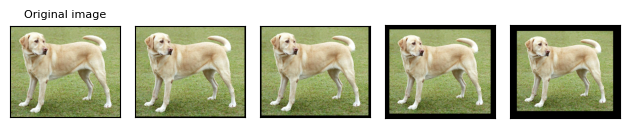

In [6]:
padded_imgs = [transforms.Pad(padding=padding)(orig_img) for padding in (3, 10, 30, 50)]
plot(padded_imgs)

## Resize
The :class:`~torchvision.transforms.Resize` transform
(see also :func:`~torchvision.transforms.functional.resize`)
resizes an image.



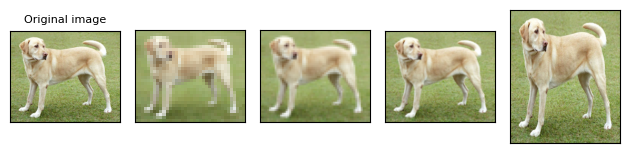

In [7]:
resized_imgs = [transforms.Resize(size=size)(orig_img) for size in (30, 50, 100, orig_img.size)]
plot(resized_imgs)

## CenterCrop
The :class:`~torchvision.transforms.CenterCrop` transform
(see also :func:`~torchvision.transforms.functional.center_crop`)
crops the given image at the center.



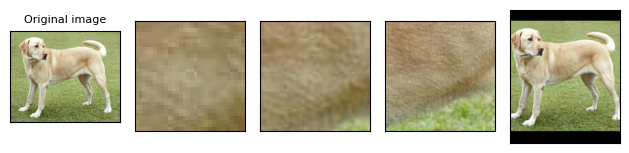

In [8]:
center_crops = [transforms.CenterCrop(size=size)(orig_img) for size in (30, 50, 100, orig_img.size)]
plot(center_crops)

## FiveCrop
The :class:`~torchvision.transforms.FiveCrop` transform
(see also :func:`~torchvision.transforms.functional.five_crop`)
crops the given image into four corners and the central crop.



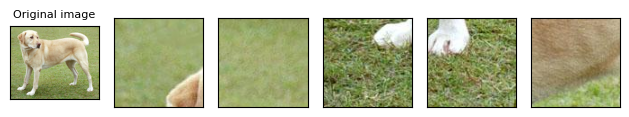

In [9]:
(top_left, top_right, bottom_left, bottom_right, center) = transforms.FiveCrop(size=(100, 100))(orig_img)
plot([top_left, top_right, bottom_left, bottom_right, center])

## Grayscale
The :class:`~torchvision.transforms.Grayscale` transform
(see also :func:`~torchvision.transforms.functional.to_grayscale`)
converts an image to grayscale



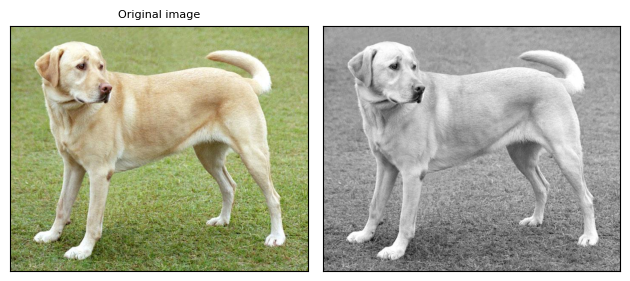

In [10]:
gray_img = transforms.Grayscale()(orig_img)
plot([gray_img], cmap='gray')

## Random transforms
The following transforms are random, which means that the same transfomer
instance will produce different result each time it transforms a given image.

### ColorJitter
The :class:`~torchvision.transforms.ColorJitter` transform
randomly changes the brightness, saturation, and other properties of an image.



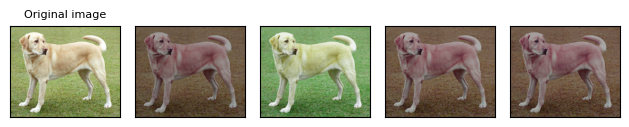

In [11]:
jitter = transforms.ColorJitter(brightness=.5, hue=.3)
jitted_imgs = [jitter(orig_img) for _ in range(4)]
plot(jitted_imgs)

### GaussianBlur
The :class:`~torchvision.transforms.GaussianBlur` transform
(see also :func:`~torchvision.transforms.functional.gaussian_blur`)
performs gaussian blur transform on an image.



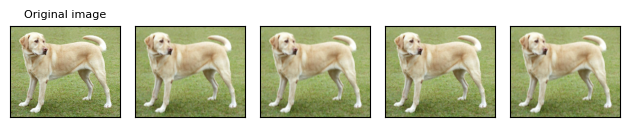

In [12]:
blurrer = transforms.GaussianBlur(kernel_size=(5, 9), sigma=(0.1, 5))
blurred_imgs = [blurrer(orig_img) for _ in range(4)]
plot(blurred_imgs)

### RandomPerspective
The :class:`~torchvision.transforms.RandomPerspective` transform
(see also :func:`~torchvision.transforms.functional.perspective`)
performs random perspective transform on an image.



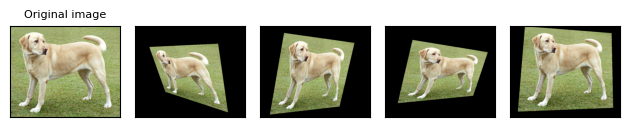

In [13]:
perspective_transformer = transforms.RandomPerspective(distortion_scale=0.6, p=1.0)
perspective_imgs = [perspective_transformer(orig_img) for _ in range(4)]
plot(perspective_imgs)

### RandomRotation
The :class:`~torchvision.transforms.RandomRotation` transform
(see also :func:`~torchvision.transforms.functional.rotate`)
rotates an image with random angle.



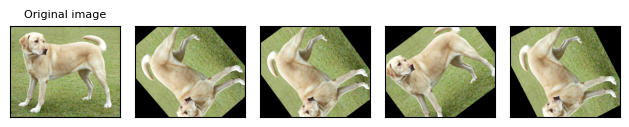

In [14]:
rotater = transforms.RandomRotation(degrees=(0, 180))
rotated_imgs = [rotater(orig_img) for _ in range(4)]
plot(rotated_imgs)

### RandomAffine
The :class:`~torchvision.transforms.RandomAffine` transform
(see also :func:`~torchvision.transforms.functional.affine`)
performs random affine transform on an image.



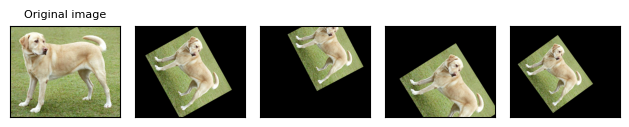

In [15]:
affine_transfomer = transforms.RandomAffine(degrees=(30, 70), translate=(0.1, 0.3), scale=(0.5, 0.75))
affine_imgs = [affine_transfomer(orig_img) for _ in range(4)]
plot(affine_imgs)

### RandomCrop
The :class:`~torchvision.transforms.RandomCrop` transform
(see also :func:`~torchvision.transforms.functional.crop`)
crops an image at a random location.



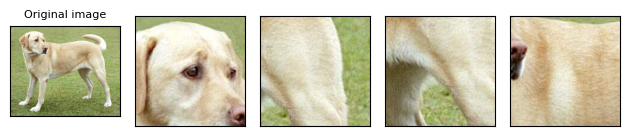

In [16]:
cropper = transforms.RandomCrop(size=(128, 128))
crops = [cropper(orig_img) for _ in range(4)]
plot(crops)

### RandomResizedCrop
The :class:`~torchvision.transforms.RandomResizedCrop` transform
(see also :func:`~torchvision.transforms.functional.resized_crop`)
crops an image at a random location, and then resizes the crop to a given
size.



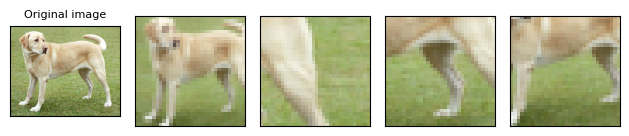

In [17]:
resize_cropper = transforms.RandomResizedCrop(size=(32, 32))
resized_crops = [resize_cropper(orig_img) for _ in range(4)]
plot(resized_crops)

### RandomInvert
The :class:`~torchvision.transforms.RandomInvert` transform
(see also :func:`~torchvision.transforms.functional.invert`)
randomly inverts the colors of the given image.



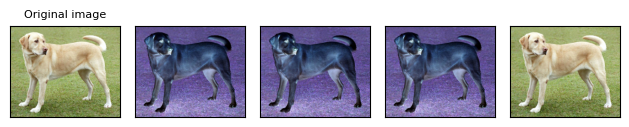

In [18]:
inverter = transforms.RandomInvert()
invertered_imgs = [inverter(orig_img) for _ in range(4)]
plot(invertered_imgs)

### RandomPosterize
The :class:`~torchvision.transforms.RandomPosterize` transform
(see also :func:`~torchvision.transforms.functional.posterize`)
randomly posterizes the image by reducing the number of bits
of each color channel.



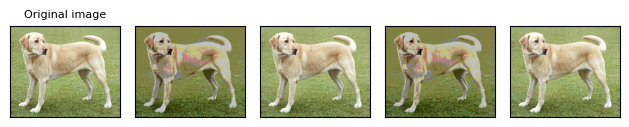

In [19]:
posterizer = transforms.RandomPosterize(bits=2)
posterized_imgs = [posterizer(orig_img) for _ in range(4)]
plot(posterized_imgs)

### RandomSolarize
The :class:`~torchvision.transforms.RandomSolarize` transform
(see also :func:`~torchvision.transforms.functional.solarize`)
randomly solarizes the image by inverting all pixel values above
the threshold.



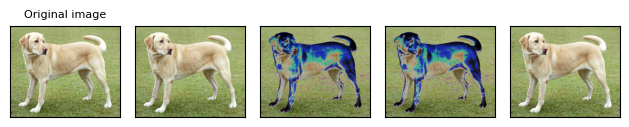

In [20]:
solarizer = transforms.RandomSolarize(threshold=192.0)
solarized_imgs = [solarizer(orig_img) for _ in range(4)]
plot(solarized_imgs)

### RandomAdjustSharpness
The :class:`~torchvision.transforms.RandomAdjustSharpness` transform
(see also :func:`~torchvision.transforms.functional.adjust_sharpness`)
randomly adjusts the sharpness of the given image.



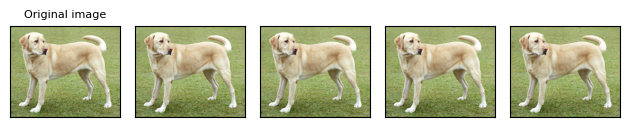

In [21]:
sharpness_adjuster = transforms.RandomAdjustSharpness(sharpness_factor=2)
sharpened_imgs = [sharpness_adjuster(orig_img) for _ in range(4)]
plot(sharpened_imgs)

### RandomAutocontrast
The :class:`~torchvision.transforms.RandomAutocontrast` transform
(see also :func:`~torchvision.transforms.functional.autocontrast`)
randomly applies autocontrast to the given image.



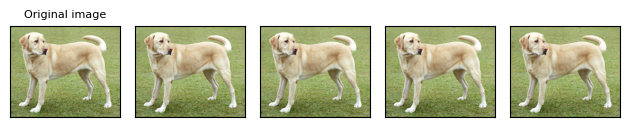

In [22]:
autocontraster = transforms.RandomAutocontrast()
autocontrasted_imgs = [autocontraster(orig_img) for _ in range(4)]
plot(autocontrasted_imgs)

### RandomEqualize
The :class:`~torchvision.transforms.RandomEqualize` transform
(see also :func:`~torchvision.transforms.functional.equalize`)
randomly equalizes the histogram of the given image.



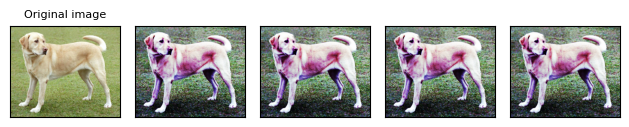

In [23]:
equalizer = transforms.RandomEqualize()
equalized_imgs = [equalizer(orig_img) for _ in range(4)]
plot(equalized_imgs)

### AutoAugment
The :class:`~torchvision.transforms.AutoAugment` transform
automatically augments data based on a given auto-augmentation policy.
See :class:`~torchvision.transforms.AutoAugmentPolicy` for the available policies.



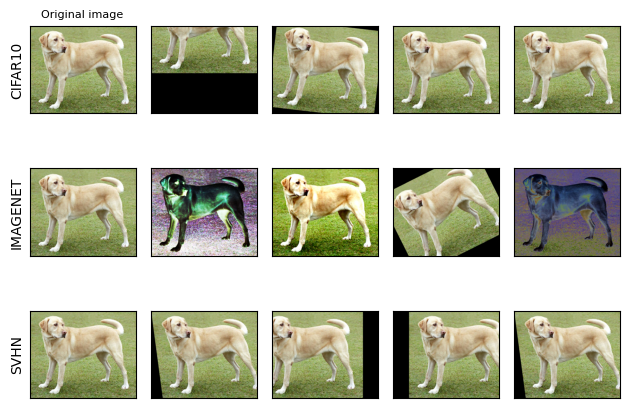

In [24]:
policies = [transforms.AutoAugmentPolicy.CIFAR10, transforms.AutoAugmentPolicy.IMAGENET, transforms.AutoAugmentPolicy.SVHN]
augmenters = [transforms.AutoAugment(policy) for policy in policies]
imgs = [
    [augmenter(orig_img) for _ in range(4)]
    for augmenter in augmenters
]
row_title = [str(policy).split('.')[-1] for policy in policies]
plot(imgs, row_title=row_title)

### RandAugment
The :class:`~torchvision.transforms.RandAugment` transform automatically augments the data.



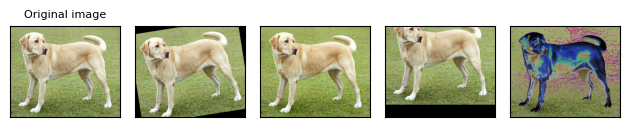

In [25]:
augmenter = transforms.RandAugment()
imgs = [augmenter(orig_img) for _ in range(4)]
plot(imgs)

### TrivialAugmentWide
The :class:`~torchvision.transforms.TrivialAugmentWide` transform automatically augments the data.



In [ ]:
augmenter = T.TrivialAugmentWide()
imgs = [augmenter(orig_img) for _ in range(4)]
plot(imgs)

## Randomly-applied transforms

Some transforms are randomly-applied given a probability ``p``.  That is, the
transformed image may actually be the same as the original one, even when
called with the same transformer instance!

### RandomHorizontalFlip
The :class:`~torchvision.transforms.RandomHorizontalFlip` transform
(see also :func:`~torchvision.transforms.functional.hflip`)
performs horizontal flip of an image, with a given probability.



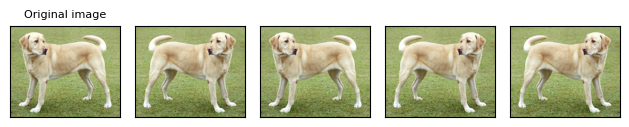

In [ ]:
hflipper = T.RandomHorizontalFlip(p=0.5)
transformed_imgs = [hflipper(orig_img) for _ in range(4)]
plot(transformed_imgs)

### RandomVerticalFlip
The :class:`~torchvision.transforms.RandomVerticalFlip` transform
(see also :func:`~torchvision.transforms.functional.vflip`)
performs vertical flip of an image, with a given probability.



In [ ]:
vflipper = T.RandomVerticalFlip(p=0.5)
transformed_imgs = [vflipper(orig_img) for _ in range(4)]
plot(transformed_imgs)

### RandomApply
The :class:`~torchvision.transforms.RandomApply` transform
randomly applies a list of transforms, with a given probability.



In [ ]:
applier = T.RandomApply(transforms=[T.RandomCrop(size=(64, 64))], p=0.5)
transformed_imgs = [applier(orig_img) for _ in range(4)]
plot(transformed_imgs)

## Training with data augmentation

In [ ]:
import os

#Numpy is linear algebra lbrary
import numpy as np
# Matplotlib is a visualizations library
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torchvision import datasets, models, transforms

### Applying Transforms to the Data Using Torchvision

In [ ]:
### This was the transform function that we applied before
# transform = transforms.Compose(
#     [transforms.Resize(224),
#      transforms.ToTensor(),
#      transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

#To define an augmentation pipeline, you need to create an instance of the Compose class.
#As an argument to the Compose class, you need to pass a list of augmentations you want to apply.
#A call to Compose will return a transform function that will perform image augmentation.
# https://pytorch.org/vision/stable/transforms.html

transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(size=256, scale=(0.8, 1.0)),
        transforms.RandomRotation(degrees=15),
        transforms.RandomHorizontalFlip(),
        transforms.CenterCrop(size=224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
    ]),
    'valid': transforms.Compose([
        transforms.Resize(size=256),
        transforms.CenterCrop(size=224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
    ]),
    'test': transforms.Compose([
        transforms.Resize(size=256),
        transforms.CenterCrop(size=224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
    ])
}


### Applying Transforms to the Data Using Albumentations

In [ ]:
import albumentations as A
from albumentations.pytorch import ToTensorV2

#To define an augmentation pipeline, you need to create an instance of the Compose class.
#As an argument to the Compose class, you need to pass a list of augmentations you want to apply.
#A call to Compose will return a transform function that will perform image augmentation.
#(https://albumentations.ai/docs/getting_started/image_augmentation/)

transforms = {
    'train': A.Compose([
        A.SmallestMaxSize(max_size=256),
#         A.ShiftScaleRotate(shift_limit=0.05, scale_limit=0.05, rotate_limit=360, p=0.5),
        A.RandomCrop(height=224, width=224),
#         A.RGBShift(r_shift_limit=15, g_shift_limit=15, b_shift_limit=15, p=0.5),
#         A.MultiplicativeNoise(multiplier=[0.5,2], per_channel=True, p=0.2),
        A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
#         A.HueSaturationValue(hue_shift_limit=0.2, sat_shift_limit=0.2, val_shift_limit=0.2, p=0.5),
        A.RandomBrightnessContrast(brightness_limit=(-0.1,0.1), contrast_limit=(-0.1, 0.1), p=0.5),
        ToTensorV2()
    ]),
    'valid': A.Compose([
        A.SmallestMaxSize(max_size=256),
        A.CenterCrop(height=224, width=224),
        A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
        ToTensorV2()
    ]),
    'test': A.Compose([
        A.SmallestMaxSize(max_size=256),
        A.CenterCrop(height=224, width=224),
        A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
        ToTensorV2()
    ])
}

If you supply the albumentations transforms directly to the `torchvision.dataset`, you will get the error

>raise KeyError("You have to pass data to augmentations as named arguments, for example: aug(image=image)")
KeyError: 'You have to pass data to augmentations as named arguments, for example: aug(image=image)'

Therefore, you need to define your dataset in a class so that you can pass the data to augmentations as named arguments.

To make a custom Dataset class: Make 3 abstract methods which are must

__init__: This method runs once when we call this class, and we pass the data or its references here with the label data.
__getitem__: This function returns one input and corresponding label at a time.
__len__: This is to be defined to create the upper bound of the data or you can say it just returns the size of the data set.

We will be discussing this further in the next session.

In [ ]:
# import cv2
import torchvision

# cv2.setNumThreads(0)
# cv2.ocl.setUseOpenCL(False)


class Cifar10Dataset(torchvision.datasets.CIFAR10):
    def __init__(self, root="~/data/cifar10", train=True, download=True, transform=None):
        super().__init__(root=root, train=train, download=download, transform=transform)

    def __getitem__(self, index):
        image, label = self.data[index], self.targets[index]

        if self.transform is not None:
            transformed = self.transform(image=image)
            image = transformed["image"]

        return image, label

In [ ]:
batch_size = 4

trainset = Cifar10Dataset(root="./data", train=True, download=True, transform=transforms['train'])

trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True)

testset = Cifar10Dataset(root="./data", train=False, download=True, transform=transforms['test'])

testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False)

classes = ('plane', 'car', 'bird', 'cat',
       'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

train_data_size = len(trainloader.dataset)
test_data_size = len(testloader.dataset)

print(train_data_size)
print(test_data_size)

Files already downloaded and verified
Files already downloaded and verified
50000
10000


In [ ]:
trainset

Dataset Cifar10Dataset
    Number of datapoints: 50000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose([
             SmallestMaxSize(always_apply=False, p=1, max_size=256, interpolation=1),
             ShiftScaleRotate(always_apply=False, p=0.5, shift_limit_x=(-0.05, 0.05), shift_limit_y=(-0.05, 0.05), scale_limit=(-0.050000000000000044, 0.050000000000000044), rotate_limit=(-360, 360), interpolation=1, border_mode=4, value=None, mask_value=None),
             RandomCrop(always_apply=False, p=1.0, height=224, width=224),
             RGBShift(always_apply=False, p=0.5, r_shift_limit=(-15, 15), g_shift_limit=(-15, 15), b_shift_limit=(-15, 15)),
             RandomBrightnessContrast(always_apply=False, p=0.5, brightness_limit=(-0.2, 0.2), contrast_limit=(-0.2, 0.2), brightness_by_max=True),
             MultiplicativeNoise(always_apply=False, p=0.2, multiplier=(0.5, 2), per_channel=True, elementwise=False),
             Normalize(always_apply=False, p

In [ ]:
# batch_size = 4


####### This is the method we used before for dataset & dataloader ################
# trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
#                                         download=True, transform=transforms['train'])
# trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
#                                           shuffle=True, num_workers=2)

# testset = torchvision.datasets.CIFAR10(root='./data', train=False,
#                                        download=True, transform=transforms['test'])
# testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
#                                          shuffle=False, num_workers=2)

###### --------------------------------------------------------------###############

# classes = ('plane', 'car', 'bird', 'cat',
#        'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# train_data_size = len(trainloader.dataset)
# test_data_size = len(testloader.dataset)

# print(train_data_size)
# print(test_data_size)

In [ ]:
#define your own model
####

# 2. LOSS AND OPTIMIZER
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# 3. move the model to GPU
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
import time # to calculate training time

def train_and_validate(model, loss_criterion, optimizer, epochs=25):
    '''
    Function to train and validate
    Parameters
        :param model: Model to train and validate
        :param loss_criterion: Loss Criterion to minimize
        :param optimizer: Optimizer for computing gradients
        :param epochs: Number of epochs (default=25)

    Returns
        model: Trained Model with best validation accuracy
        history: (dict object): Having training loss, accuracy and validation loss, accuracy
    '''

    start = time.time()
    history = []
    best_acc = 0.0

    for epoch in range(epochs):
        epoch_start = time.time()
        print("Epoch: {}/{}".format(epoch+1, epochs))

        # Set to training mode
        model.train()

        # Loss and Accuracy within the epoch
        train_loss = 0.0
        train_acc = 0.0

        valid_loss = 0.0
        valid_acc = 0.0

        for i, (inputs, labels) in enumerate(trainloader):

            inputs = inputs.to(device)
            labels = labels.to(device)

            # Clean existing gradients
            optimizer.zero_grad()

            # Forward pass - compute outputs on input data using the model
            outputs = model(inputs)

            # Compute loss
            loss = loss_criterion(outputs, labels)

            # Backpropagate the gradients
            loss.backward()

            # Update the parameters
            optimizer.step()

            # Compute the total loss for the batch and add it to train_loss
            train_loss += loss.item() * inputs.size(0)

            # Compute the accuracy
            ret, predictions = torch.max(outputs.data, 1)
            correct_counts = predictions.eq(labels.data.view_as(predictions))

            # Convert correct_counts to float and then compute the mean
            acc = torch.mean(correct_counts.type(torch.FloatTensor))

            # Compute total accuracy in the whole batch and add to train_acc
            train_acc += acc.item() * inputs.size(0)

            #print("Batch number: {:03d}, Training: Loss: {:.4f}, Accuracy: {:.4f}".format(i, loss.item(), acc.item()))


        # Validation - No gradient tracking needed
        with torch.no_grad():

            # Set to evaluation mode
            model.eval()

            # Validation loop
            for j, (inputs, labels) in enumerate(testloader):
                inputs = inputs.to(device)
                labels = labels.to(device)

                # Forward pass - compute outputs on input data using the model
                outputs = model(inputs)

                # Compute loss
                loss = loss_criterion(outputs, labels)

                # Compute the total loss for the batch and add it to valid_loss
                valid_loss += loss.item() * inputs.size(0)

                # Calculate validation accuracy
                ret, predictions = torch.max(outputs.data, 1)
                correct_counts = predictions.eq(labels.data.view_as(predictions))

                # Convert correct_counts to float and then compute the mean
                acc = torch.mean(correct_counts.type(torch.FloatTensor))

                # Compute total accuracy in the whole batch and add to valid_acc
                valid_acc += acc.item() * inputs.size(0)

                #print("Validation Batch number: {:03d}, Validation: Loss: {:.4f}, Accuracy: {:.4f}".format(j, loss.item(), acc.item()))

        # Find average training loss and training accuracy
        avg_train_loss = train_loss/train_data_size
        avg_train_acc = train_acc/train_data_size

        # Find average training loss and training accuracy
        avg_test_loss = valid_loss/test_data_size
        avg_test_acc = valid_acc/test_data_size

        history.append([avg_train_loss, avg_test_loss, avg_train_acc, avg_test_acc])

        epoch_end = time.time()

        print("Epoch : {:03d}, Training: Loss: {:.4f}, Accuracy: {:.4f}%, \n\t\tValidation : Loss : {:.4f}, Accuracy: {:.4f}%, Time: {:.4f}s".format(epoch, avg_train_loss, avg_train_acc*100, avg_test_loss, avg_test_acc*100, epoch_end-epoch_start))

        # Save if the model has best accuracy till now
        torch.save(model, 'cifar10_model_'+str(epoch)+'.pt')

    return model, history

In [ ]:
# 4. Train the model for 10 epochs

num_epochs = 10
trained_model, history = train_and_validate(model, criterion, optimizer, num_epochs)

Epoch: 1/10
Epoch : 000, Training: Loss: 1.6352, Accuracy: 44.8600%, 
		Validation : Loss : 0.5972, Accuracy: 80.2700%, Time: 507.7286s
Epoch: 2/10
Epoch : 001, Training: Loss: 1.2788, Accuracy: 56.2320%, 
		Validation : Loss : 0.4858, Accuracy: 84.0500%, Time: 515.9593s
Epoch: 3/10


KeyboardInterrupt: 